#### IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import category_encoders as ce
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,RobustScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import xgboost as xgb
import pickle

#### Load DataSets

In [2]:
data_store=pd.read_csv("datasets\stores data-set.csv")
data_features=pd.read_csv("datasets\Features data set.csv")
data_sales=pd.read_csv("datasets\sales data-set.csv")

#### Merge Datasets

In [3]:
data_all = pd.merge(pd.merge(data_features, data_sales, on=['Store', 'Date', 'IsHoliday']), data_store, on=['Store'])
data_all.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315
5,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,5749.03,A,151315
6,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,7,21084.08,A,151315
7,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,8,40129.01,A,151315
8,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,9,16930.99,A,151315
9,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,10,30721.50,A,151315


#### Data Overview

In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Date            421570 non-null object
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [5]:
data_all.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,44.260317,15981.258123,136727.915739
std,12.785297,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,30.492054,22711.183519,60980.583328
min,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,-4988.940000,34875.000000
25%,11.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,18.000000,2079.650000,93638.000000
50%,22.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,37.000000,7612.030000,140167.000000
75%,33.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,74.000000,20205.852500,202505.000000
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000,219622.000000


In [6]:
view_data=data_all.copy()
df_overview=pd.DataFrame(columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'],
             data=[[kolom,
                    view_data[kolom].dtype,
                    sum(view_data[kolom].isnull()),
                    sum(view_data[kolom].isnull())/len(view_data)*100,
                    view_data[kolom].nunique(),
                    list(view_data[kolom].sample(5).drop_duplicates().values)
             ]for kolom in view_data.columns]
            )
del view_data
df_overview

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Store,int64,0,0.000000,45,"[35, 25, 6, 4, 14]"
1,Date,object,0,0.000000,143,"[11/03/2011, 07/09/2012, 17/12/2010, 09/09/201..."
2,Temperature,float64,0,0.000000,3528,"[51.32, 50.93, 72.94, 72.98, 43.78]"
3,Fuel_Price,float64,0,0.000000,892,"[4.056, 2.779, 3.805, 4.013999999999999, 3.703..."
4,MarkDown1,float64,270889,64.257181,2277,"[2538.45, nan, 7373.92, 1985.37]"
5,MarkDown2,float64,310322,73.611025,1499,"[1645.11, 446.92, 53918.62, 123.0, nan]"
6,MarkDown3,float64,284479,67.480845,1662,"[nan, 93.06]"
7,MarkDown4,float64,286603,67.984676,1944,"[nan, 225.2, 542.89]"
8,MarkDown5,float64,270138,64.079038,2293,"[nan, 3428.92]"
9,CPI,float64,0,0.000000,2145,"[210.1842358, 134.4357333, 130.70129029999998,..."


#### Filling Missing Value

In [4]:
data_all.fillna(0,inplace=True)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Date            421570 non-null object
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


#### Indikator KOLOM IsHoliday di Ganti 0 dan 1 

In [5]:
data_all['IsHoliday']=data_all['IsHoliday'].map({True:1,False:0})
data_all.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,32229.38,A,151315


#### Ganti Temperature dari Fahrenheit menjadi celcius dan kolom Size dari SquareFeet menjadi SquareMeter

In [6]:
data_all['Temperature']=data_all['Temperature'].apply(lambda x: ((x-32)*5/9))
data_all['Size']=data_all['Size']/10.764
data_all.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,24924.50,A,14057.506503
1,1,05/02/2010,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,50605.27,A,14057.506503
2,1,05/02/2010,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3,13740.12,A,14057.506503
3,1,05/02/2010,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4,39954.04,A,14057.506503
4,1,05/02/2010,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,32229.38,A,14057.506503


#### Kolom Date dibagi menjadi minggu, bulan,dan tahun

In [7]:
data_all['Date'] = pd.to_datetime(data_all['Date'])
data_all['week'] =data_all['Date'].dt.week
data_all['month'] =data_all['Date'].dt.month
data_all['year']=data_all['Date'].dt.year
data_all.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,week,month,year
0,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,24924.50,A,14057.506503,17,5,2010
1,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,50605.27,A,14057.506503,17,5,2010
2,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3,13740.12,A,14057.506503,17,5,2010
3,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4,39954.04,A,14057.506503,17,5,2010
4,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,32229.38,A,14057.506503,17,5,2010


#### EDA

In [2]:
data_all=pd.read_csv("datasets\data_retail_NANFREE.csv")
data_all.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,week,month,year
0,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,24924.50,A,14057.506503,17,5,2010
1,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,50605.27,A,14057.506503,17,5,2010
2,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3,13740.12,A,14057.506503,17,5,2010
3,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4,39954.04,A,14057.506503,17,5,2010
4,1,2010-05-02,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,32229.38,A,14057.506503,17,5,2010


In [79]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
Store           421570 non-null int64
Date            421570 non-null object
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday       421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null float64
week            421570 non-null int64
month           421570 non-null int64
year            421570 non-null int64
dtypes: float64(11), int64(6), object(2)
memory usage: 61.1+ MB


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


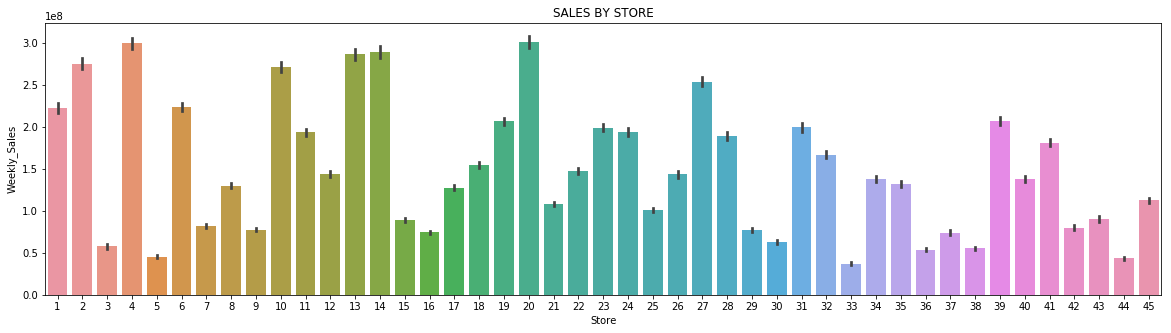

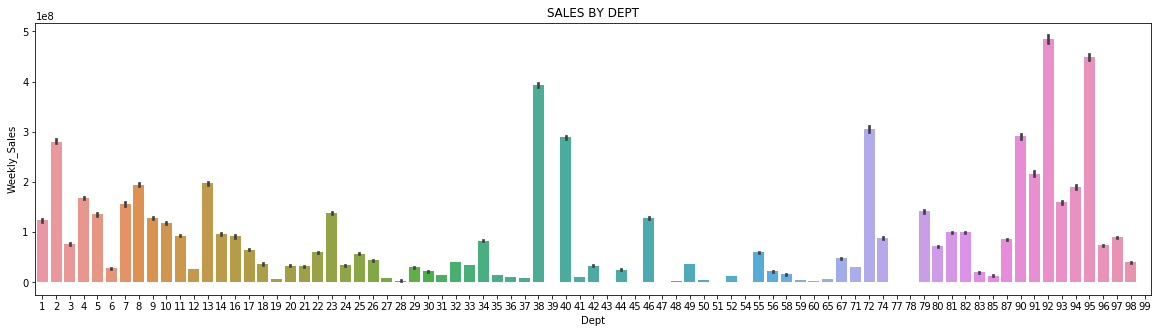

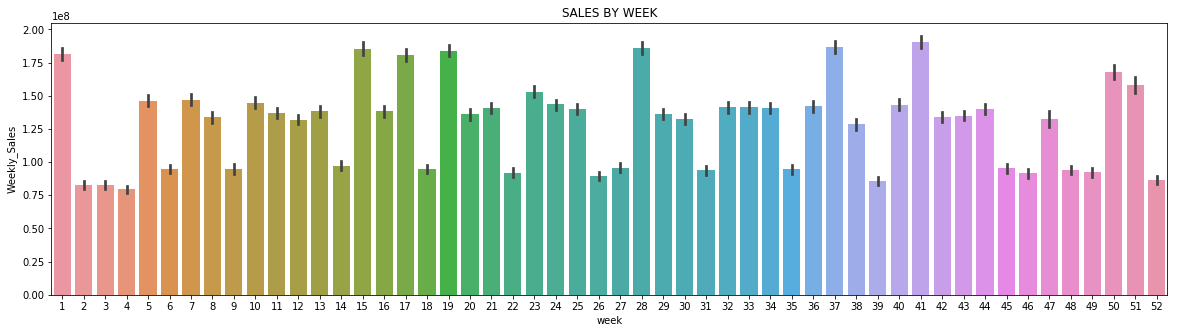

In [8]:
plt.figure(figsize=(20,5))
plt.title('SALES BY STORE')
sns.barplot(data=data_all,x='Store',y='Weekly_Sales',estimator=np.sum)
plt.show()
plt.figure(figsize=(20,5))
plt.title('SALES BY DEPT')
sns.barplot(data=data_all,x='Dept',y='Weekly_Sales',estimator=np.sum)
plt.show()
plt.figure(figsize=(20,5))
plt.title('SALES BY WEEK')
sns.barplot(data=data_all,x='week',y='Weekly_Sales',estimator=np.sum)
plt.show()

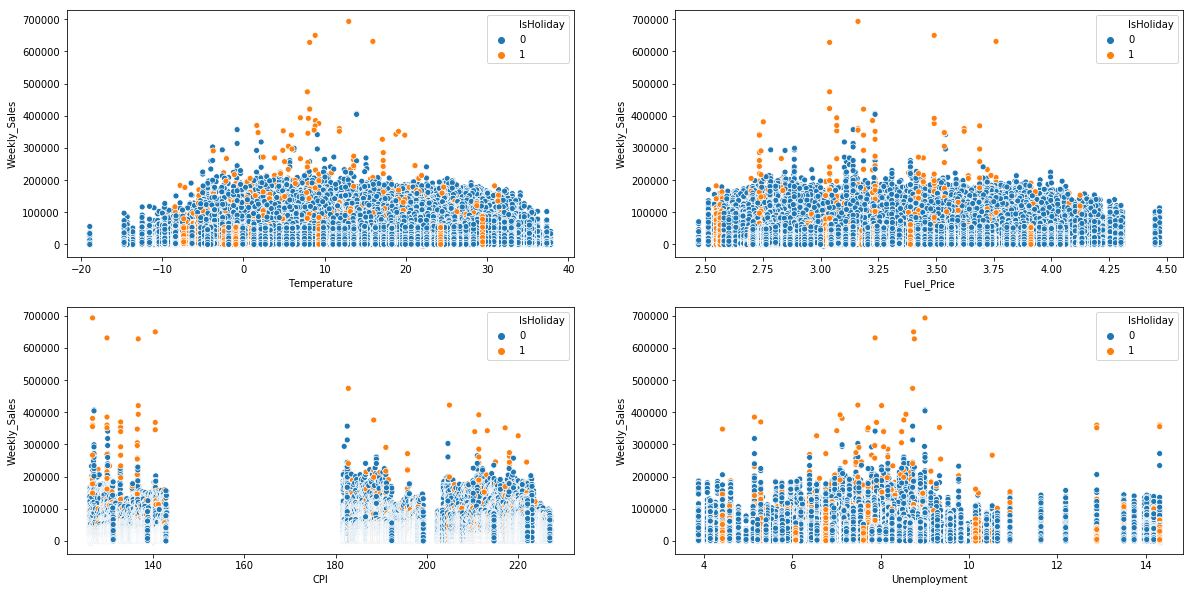

In [4]:
list_kolom=['Temperature','Fuel_Price','CPI','Unemployment']

plt.figure(figsize=(20, 10))
size=(2, 2)
baris=0
kolom=0
for features in list_kolom:
    plt.subplot2grid(size, (baris, kolom))
    sns.scatterplot(data=data_all,x=features,y='Weekly_Sales',hue='IsHoliday')
    kolom+=1
    if kolom>1:
        baris+=1
        kolom=0


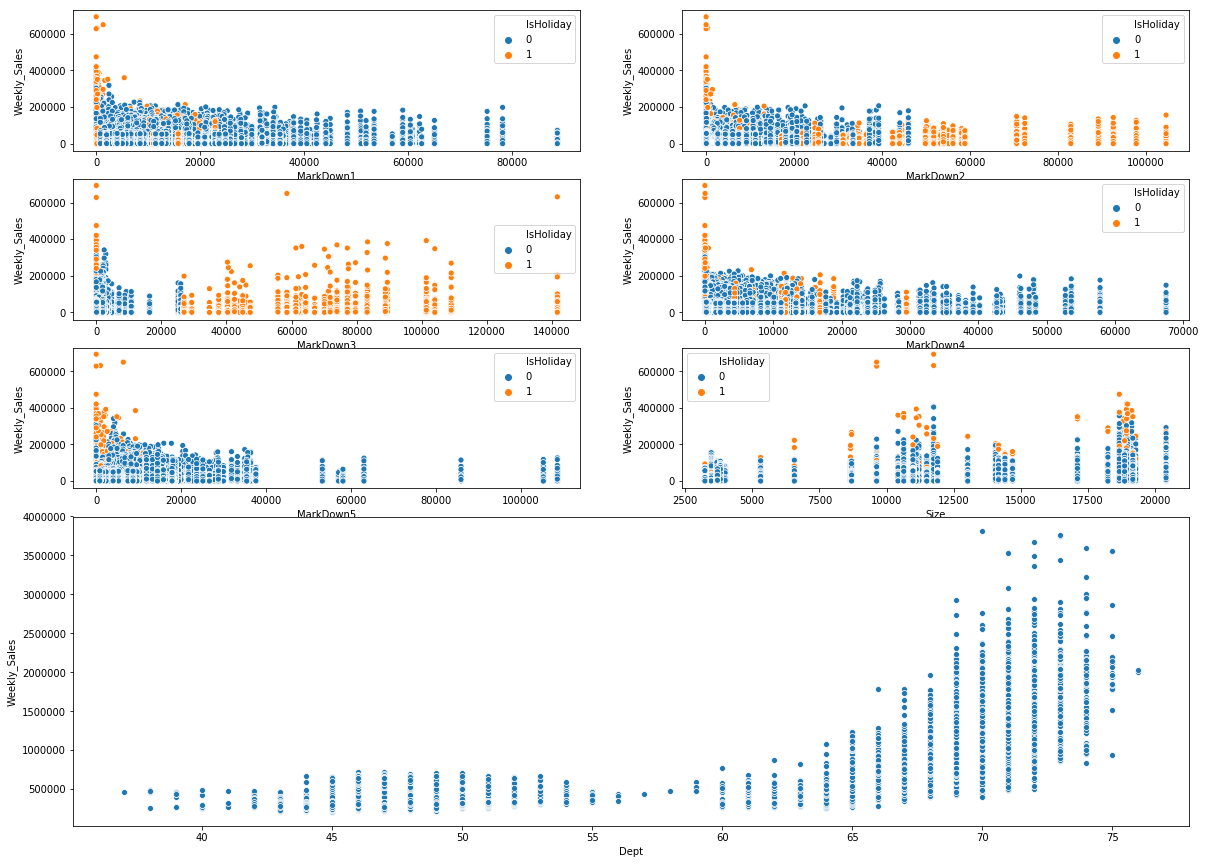

In [5]:
list_kolom=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Size']

plt.figure(figsize=(20, 15))
size=(5, 2)
baris=0
kolom=0
for features in list_kolom:
    plt.subplot2grid(size, (baris, kolom))
    sns.scatterplot(data=data_all,x=features,y='Weekly_Sales',hue='IsHoliday')
    kolom+=1
    if kolom>1:
        baris+=1
        kolom=0
temp_df=data_all.groupby(['Store','Date','week','year','IsHoliday','Type'],as_index=False).agg({'Dept':'count','Weekly_Sales':'sum'})
plt.subplot2grid(size, (baris, kolom),colspan=2,rowspan=2)
sns.scatterplot(data=temp_df,x='Dept',y='Weekly_Sales')


#### *Group berdasarkan Store,Date,week,year,IsHoliday method mean
#### *Isi Dept dengan jumlah Dept perStore
#### *Isi Target Weekly Sales dengan total penjualan perminggu

In [16]:
data_all_grouped=data_all.groupby(['Store','Date','week','year','IsHoliday','Type'],as_index=False).mean()
data_all_grouped['Dept']=data_all.groupby(['Store','Date','week','year','IsHoliday','Type'],as_index=False).count()['Dept']
data_all_grouped['Weekly_Sales']=data_all.groupby(['Store','Date','week','year','IsHoliday','Type'],as_index=False).sum()['Weekly_Sales']
data_all_grouped.head()

,Store,Date,week,year,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size,month
0,1,2010-01-10,1,2010,0,A,22.161111,2.603,0.0,0.0,0.0,0.0,0.0,211.671990,7.838,73,1453329.50,14057.506503,1.0
1,1,2010-02-04,5,2010,0,A,16.816667,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,72,1594968.28,14057.506503,2.0
2,1,2010-02-07,5,2010,0,A,27.172222,2.669,0.0,0.0,0.0,0.0,0.0,211.223533,7.787,73,1492418.14,14057.506503,2.0
3,1,2010-02-19,7,2010,0,A,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,73,1611968.17,14057.506503,2.0
4,1,2010-02-26,8,2010,0,A,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,72,1409727.59,14057.506503,2.0


#### HEATMAP

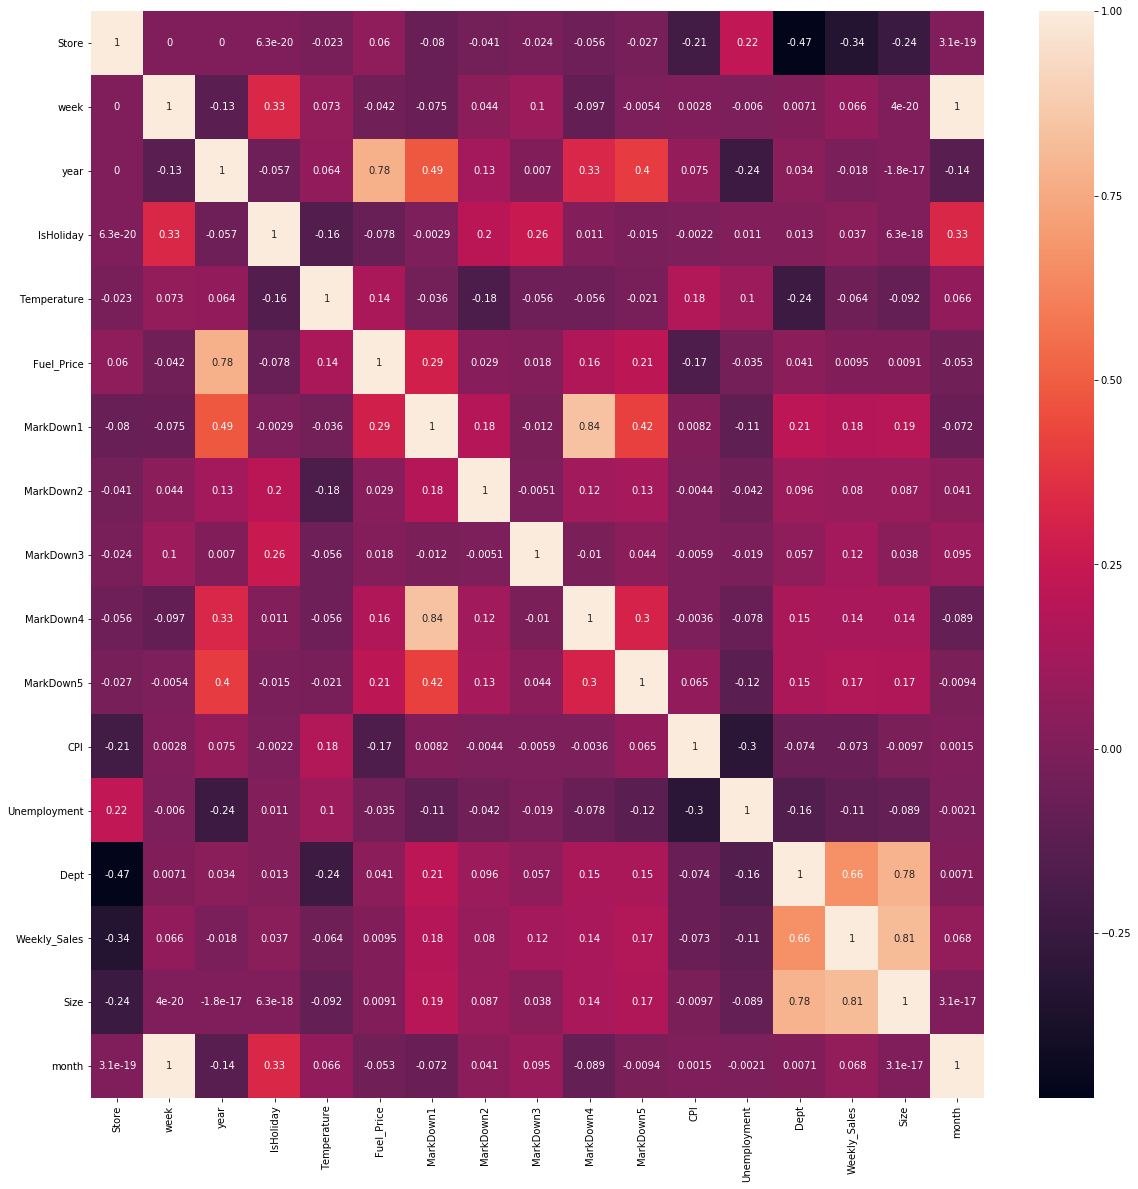

In [11]:
plt.figure(figsize=[20,20])
sns.heatmap(data_all_grouped.corr(),annot=True)

#### MarkDown di SUM ke SUM_MARKDOWN

In [17]:
data_all_grouped['Markdown']=(data_all_grouped['MarkDown1']+data_all_grouped['MarkDown2']+data_all_grouped['MarkDown3']
                          +data_all_grouped['MarkDown4']+data_all_grouped['MarkDown5'])

data_all_grouped=data_all_grouped.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data_all_grouped.head()

,Store,Date,week,year,IsHoliday,Type,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,month,Markdown
0,1,2010-01-10,1,2010,0,A,22.161111,2.603,211.671990,7.838,73,1453329.50,14057.506503,1.0,0.0
1,1,2010-02-04,5,2010,0,A,16.816667,2.719,210.820450,7.808,72,1594968.28,14057.506503,2.0,0.0
2,1,2010-02-07,5,2010,0,A,27.172222,2.669,211.223533,7.787,73,1492418.14,14057.506503,2.0,0.0
3,1,2010-02-19,7,2010,0,A,4.405556,2.514,211.289143,8.106,73,1611968.17,14057.506503,2.0,0.0
4,1,2010-02-26,8,2010,0,A,8.127778,2.561,211.319643,8.106,72,1409727.59,14057.506503,2.0,0.0


#### Pairplot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<Figure size 1440x1440 with 0 Axes>

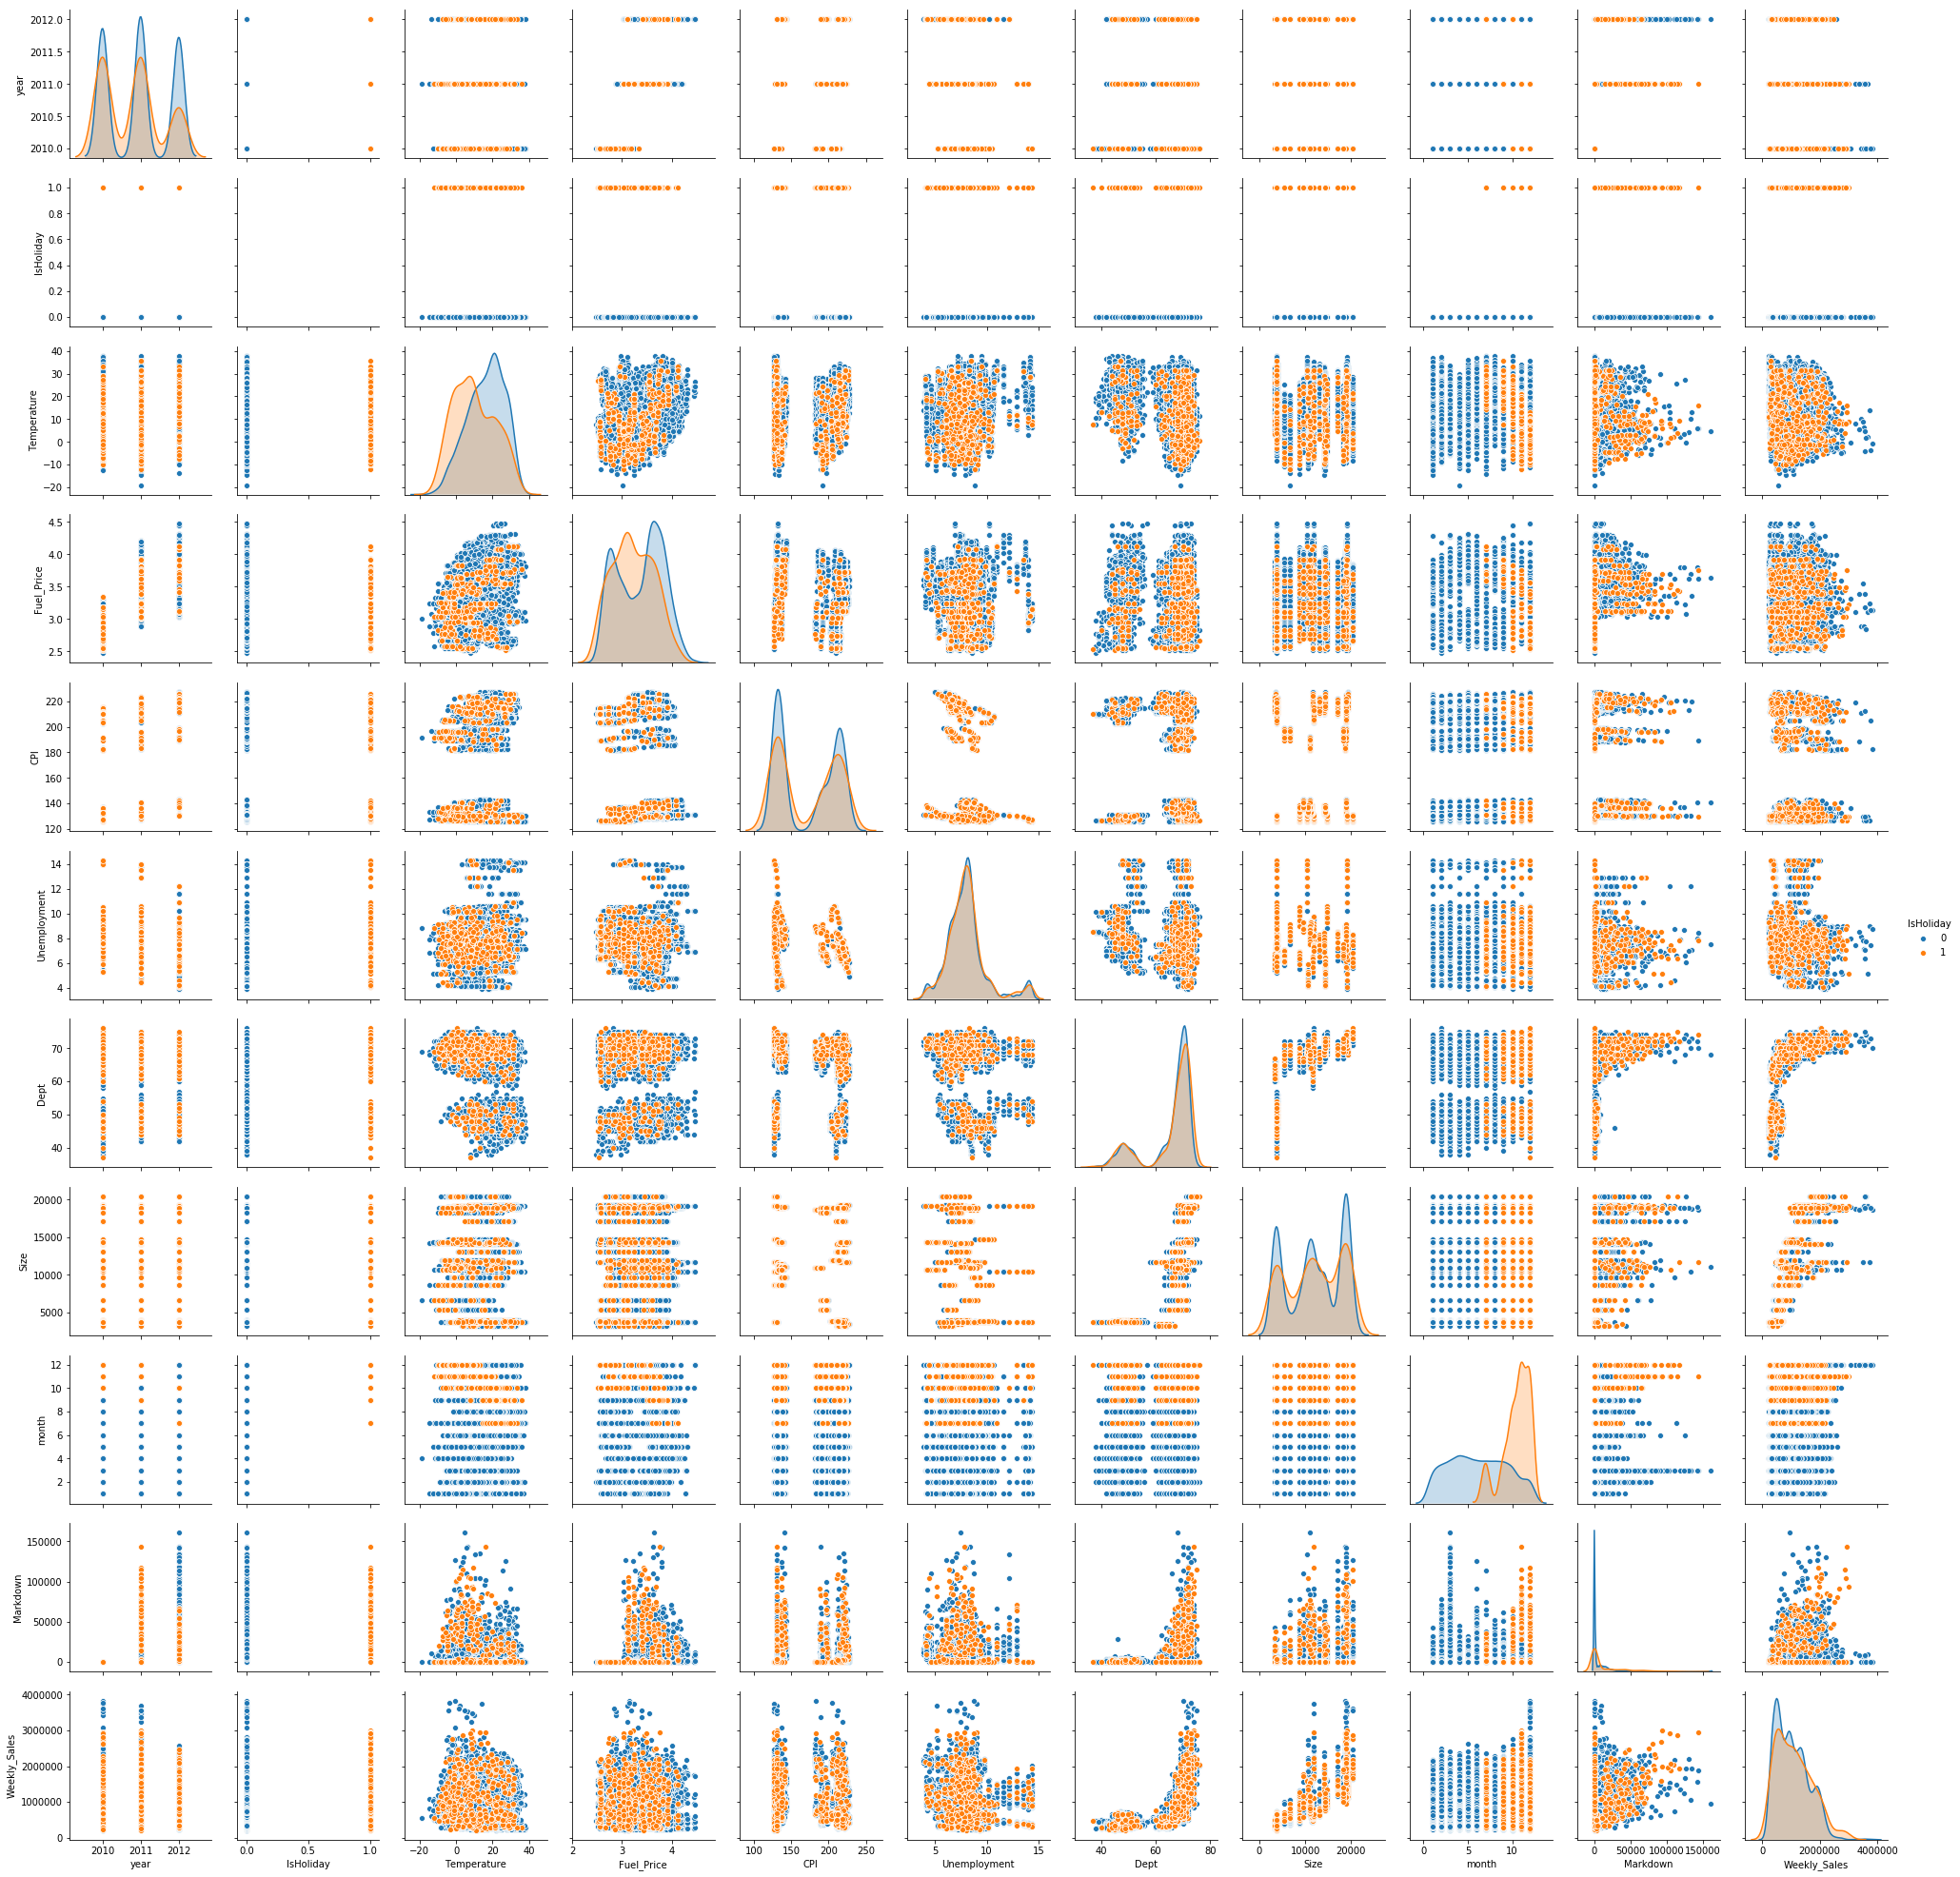

In [13]:
plt.figure(figsize=[20,20])
sns.pairplot(data=data_all_grouped[['year', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Dept','Size', 'month','Markdown','Weekly_Sales']],hue='IsHoliday')

#### GET DUMMIES kolom Store Type and week

In [18]:
data_all_grouped=pd.get_dummies(data=data_all_grouped,columns=['week','Type'])
data_all_grouped.head()

,Store,Date,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,...,week_46,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C
0,1,2010-01-10,2010,0,22.161111,2.603,211.671990,7.838,73,1453329.50,...,0,0,0,0,0,0,0,1,0,0
1,1,2010-02-04,2010,0,16.816667,2.719,210.820450,7.808,72,1594968.28,...,0,0,0,0,0,0,0,1,0,0
2,1,2010-02-07,2010,0,27.172222,2.669,211.223533,7.787,73,1492418.14,...,0,0,0,0,0,0,0,1,0,0
3,1,2010-02-19,2010,0,4.405556,2.514,211.289143,8.106,73,1611968.17,...,0,0,0,0,0,0,0,1,0,0
4,1,2010-02-26,2010,0,8.127778,2.561,211.319643,8.106,72,1409727.59,...,0,0,0,0,0,0,0,1,0,0


#### Drop Kolom Date dan Month

In [19]:
data_all_grouped=data_all_grouped.drop(['Store','Date','month'],axis=1)
data_all_grouped.head()

,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,Markdown,...,week_46,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C
0,2010,0,22.161111,2.603,211.671990,7.838,73,1453329.50,14057.506503,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2010,0,16.816667,2.719,210.820450,7.808,72,1594968.28,14057.506503,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2010,0,27.172222,2.669,211.223533,7.787,73,1492418.14,14057.506503,0.0,...,0,0,0,0,0,0,0,1,0,0
3,2010,0,4.405556,2.514,211.289143,8.106,73,1611968.17,14057.506503,0.0,...,0,0,0,0,0,0,0,1,0,0
4,2010,0,8.127778,2.561,211.319643,8.106,72,1409727.59,14057.506503,0.0,...,0,0,0,0,0,0,0,1,0,0


#### TRAIN SPLIT TEST 

In [20]:
data=data_all_grouped.drop('Weekly_Sales',axis=1)
target=data_all_grouped['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30,random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30,random_state=101)

del data,target

#### Model Train

In [18]:
model = pickle.load(open('model_final_XGBoosts_v2.sav','rb'))

In [21]:
model=xgb.XGBRegressor(random_state=101,n_jobs=-1,n_estimators=10000,max_depth=5)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=101,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [22]:
import pickle
filename= 'model_final.sav'
pickle.dump(model,open(filename,'wb'))

#### Predict Train and Evaluation 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


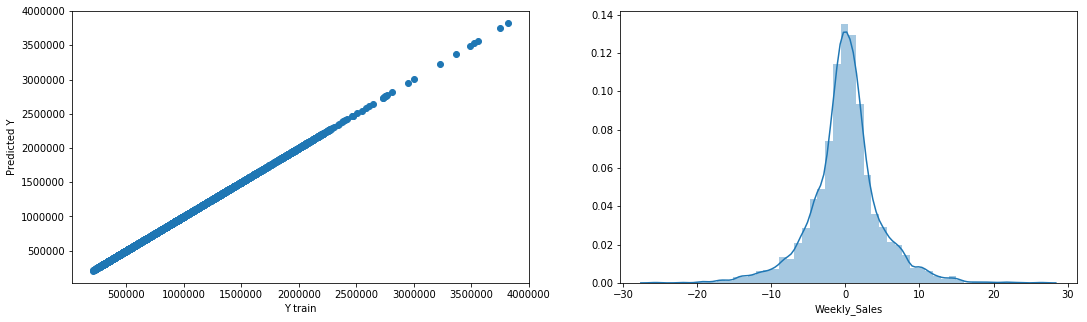

MAE: 3.2874526094502254
MSE: 22.18593481602795
RMSE: 4.710194774744241
R2 Score: 0.9999999999299726
Jumlah yg menyimpang diatas 20% : 0  Dari : 3152
Persentase yg menyimpang diatas 20% : 0.0


         Prediction     Actual   selisih  Selisih %
1679  362738.93750  362758.94  20.00250   0.005514
1812  209975.21875  209986.25  11.03125   0.005253
1903  253062.65625  253050.10  12.55625   0.004962
511   284509.59375  284496.14  13.45375   0.004729
2216  236167.15625  236157.12  10.03625   0.004250
1222  360241.40625  360256.58  15.17375   0.004212
2260  500269.81250  500250.80  19.01250   0.003801
583   354092.06250  354078.95  13.11250   0.003703
371   290389.31250  290399.66  10.34750   0.003563
2212  768363.62500  768390.05  26.42500   0.003439
1463  289211.12500  289201.21   9.91500   0.003428
3134  424711.37500  424697.05  14.32500   0.003373
2050  364618.71875  364606.70  12.01875   0.003296
742   329128.90625  329139.73  10.82375   0.003288
837   457869.25000  457884.06  14.81000  

In [23]:
predictions = model.predict(X_train)

plt.figure(figsize=(18, 5))
plt.subplot2grid((1,2), (0, 0))
plt.scatter(y_train,predictions)
plt.xlabel('Y train')
plt.ylabel('Predicted Y')
plt.subplot2grid((1,2), (0, 1))
sns.distplot((y_train-predictions),bins=50)
plt.show()

print('MAE:', mean_absolute_error(y_train, predictions))
print('MSE:', mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', r2_score(y_train,predictions))

data_actual=y_train.copy()
table_presentasi=pd.DataFrame(columns=['Prediction','Actual','selisih','Selisih %'],
                             data=[[
                                 predictions[i],
                                 data_actual.values[i],
                                abs(predictions[i]-data_actual.values[i]),
                                abs(predictions[i]-data_actual.values[i])/data_actual.values[i]*100
                             ]for i in range(len(predictions))])
del data_actual

print('Jumlah yg menyimpang diatas 20% :',sum(table_presentasi['Selisih %']>20),' Dari :',len(table_presentasi))
print('Persentase yg menyimpang diatas 20% :',(sum(table_presentasi['Selisih %']>20)/len(table_presentasi)*100))
print('\n\n',table_presentasi.sort_values('Selisih %',ascending=False).head(np.max([20,sum(table_presentasi['Selisih %']>20)])))

#### Predict Validation and Evaluation 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


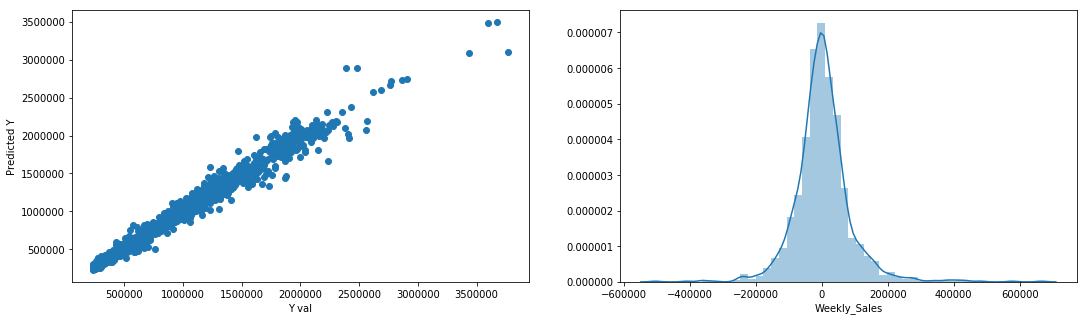

MAE: 57892.918258136095
MSE: 7609950309.516664
RMSE: 87235.02914263663
R2 Score: 0.9759610901513321
Jumlah yg menyimpang diatas 20% : 44  Dari : 1352
Persentase yg menyimpang diatas 20% : 3.2544378698224854


         Prediction      Actual       selisih  Selisih %
1073  8.174621e+05   576332.05  241130.07500  41.838741
1166  3.871458e+05   278253.28  108892.53250  39.134321
443   5.928572e+05   428631.91  164225.34000  38.313839
252   4.178556e+05   303974.28  113881.28250  37.464118
300   3.809036e+05   278646.35  102257.24375  36.697859
477   7.504421e+05   551799.63  198642.43250  35.999015
1162  5.899443e+05   436221.26  153723.05250  35.239698
427   3.431763e+05   256235.19   86941.12250  33.930204
872   5.104295e+05   761793.94  251364.44000  32.996382
123   3.909933e+05   296765.59   94227.69125  31.751556
1171  7.949184e+05   605325.43  189592.94500  31.320829
1330  1.591291e+06  1227148.13  364142.49500  29.673883
533   5.516536e+05   426959.62  124693.94250  29.205090
111   

In [24]:
predictions = model.predict(X_val)

plt.figure(figsize=(18, 5))
plt.subplot2grid((1,2), (0, 0))
plt.scatter(y_val,predictions)
plt.xlabel('Y val')
plt.ylabel('Predicted Y')
plt.subplot2grid((1,2), (0, 1))
sns.distplot((y_val-predictions),bins=50)
plt.show()

print('MAE:', mean_absolute_error(y_val, predictions))
print('MSE:', mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_val, predictions)))
print('R2 Score:', r2_score(y_val,predictions))

data_actual=y_val.copy()
table_presentasi=pd.DataFrame(columns=['Prediction','Actual','selisih','Selisih %'],
                             data=[[
                                 predictions[i],
                                 data_actual.values[i],
                                abs(predictions[i]-data_actual.values[i]),
                                abs(predictions[i]-data_actual.values[i])/data_actual.values[i]*100
                             ]for i in range(len(predictions))])
del data_actual

print('Jumlah yg menyimpang diatas 20% :',sum(table_presentasi['Selisih %']>20),' Dari :',len(table_presentasi))
print('Persentase yg menyimpang diatas 20% :',(sum(table_presentasi['Selisih %']>20)/len(table_presentasi)*100))
print('\n\n',table_presentasi.sort_values('Selisih %',ascending=False).head(np.max([20,sum(table_presentasi['Selisih %']>20)])))

#### Predict Test and Evaluation 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


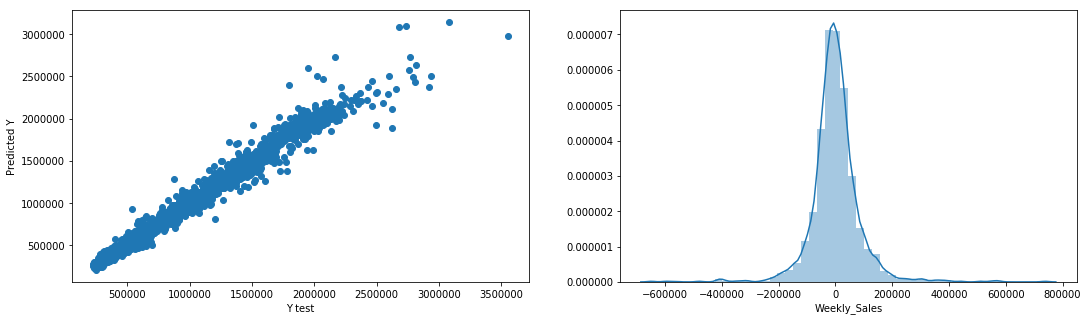

MAE: 56371.94619044537
MSE: 7813434084.57797
RMSE: 88393.63147070025
R2 Score: 0.9757663659455615
Jumlah yg menyimpang diatas 20% : 63  Dari : 1931
Persentase yg menyimpang diatas 20% : 3.2625582599689276


         Prediction      Actual       selisih  Selisih %
757   9.257182e+05   540922.94  384795.31000  71.136807
1079  1.282140e+06   873347.55  408791.95000  46.807477
549   5.727401e+05   398445.15  174294.97500  43.743781
447   4.014079e+05   282552.58  118855.32625  42.064853
925   4.258893e+05   304300.91  121588.43375  39.956645
1154  4.285043e+05   311144.16  117360.15250  37.718899
567   7.874367e+05   583364.02  204072.66750  34.982046
85    2.392884e+06  1796203.51  596680.49000  33.218980
204   2.596301e+06  1949183.14  647117.86000  33.199439
217   8.107659e+05  1200888.28  390122.40500  32.486153
1397  4.472888e+05   340238.38  107050.37000  31.463343
51    1.723992e+06  1313729.72  410261.78000  31.228781
4     3.437905e+05   262407.57   81382.96125  31.013953
1093  8.

In [25]:
predictions = model.predict(X_test)

plt.figure(figsize=(18, 5))
plt.subplot2grid((1,2), (0, 0))
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.subplot2grid((1,2), (0, 1))
sns.distplot((y_test-predictions),bins=50)
plt.show()

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', r2_score(y_test,predictions))

data_actual=y_test.copy()
table_presentasi=pd.DataFrame(columns=['Prediction','Actual','selisih','Selisih %'],
                             data=[[
                                 predictions[i],
                                 data_actual.values[i],
                                abs(predictions[i]-data_actual.values[i]),
                                abs(predictions[i]-data_actual.values[i])/data_actual.values[i]*100
                             ]for i in range(len(predictions))])
del data_actual

print('Jumlah yg menyimpang diatas 20% :',sum(table_presentasi['Selisih %']>20),' Dari :',len(table_presentasi))
print('Persentase yg menyimpang diatas 20% :',(sum(table_presentasi['Selisih %']>20)/len(table_presentasi)*100))
print('\n\n',table_presentasi.sort_values('Selisih %',ascending=False).head(np.max([20,sum(table_presentasi['Selisih %']>20)])))

#### Testing K-Fold

In [26]:
kf=KFold(n_splits=10,shuffle=True)

data=data_all_grouped.drop('Weekly_Sales',axis=1)
target=data_all_grouped['Weekly_Sales']
test_num=1
Error_list={'MAE':[],'MSE':[],'RMSE':[],'R2 Score':[]}
jumlah_salah=0
total_data=0

for train_index,val_index in kf.split(data,target):
    X_train,X_val = data.iloc[train_index],data.iloc[val_index]
    y_train,y_val = target.iloc[train_index],target.iloc[val_index]
        
#     model=XGBRegressor(random_state=101,n_jobs=-1,n_estimators=200,max_depth=100)
#     model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    
    print('\n\nTEST NO:',test_num)
    test_num+=1
    print('MAE:', mean_absolute_error(y_val, predictions))
    print('MSE:', mean_squared_error(y_val, predictions))
    print('RMSE:', np.sqrt(mean_squared_error(y_val, predictions)))
    print('R2 Score:', r2_score(y_val,predictions))
    
    data_actual=y_val.copy()
    table_presentasi=pd.DataFrame(columns=['Prediction','Actual','selisih','Selisih %'],
                                 data=[[
                                     predictions[i],
                                     data_actual.values[i],
                                    abs(predictions[i]-data_actual.values[i]),
                                    abs(predictions[i]-data_actual.values[i])/data_actual.values[i]*100
                                 ]for i in range(len(predictions))])
    
    print('Jumlah yg menyimpang diatas 20% :',sum(table_presentasi['Selisih %']>20),' Dari :',len(table_presentasi))
    print('Persentase yg menyimpang diatas 20% :',(sum(table_presentasi['Selisih %']>20)/len(table_presentasi)*100))
    
    Error_list['MAE'].append(mean_absolute_error(y_val, predictions))
    Error_list['MSE'].append(mean_squared_error(y_val, predictions))
    Error_list['RMSE'].append(np.sqrt(mean_squared_error(y_val, predictions)))
    Error_list['R2 Score'].append(r2_score(y_val,predictions))
    jumlah_salah+=sum(table_presentasi['Selisih %']>20)
    total_data+=len(table_presentasi)

print('\n\n')
print('MEAN MAE:', np.mean(Error_list['MAE']))
print('MEAN MSE:', np.mean(Error_list['MSE']))
print('MEAN RMSE:', np.mean(Error_list['RMSE']))
print('MEAN R2 Score:', np.mean(Error_list['R2 Score']))
print('Jumlah yg menyimpang diatas 20% :',jumlah_salah,' Dari :',total_data)
print('Persentase yg menyimpang diatas 20% :',jumlah_salah/total_data*100)



del data_actual,table_presentasi,Error_list,test_num,data,target,jumlah_salah,total_data



TEST NO: 1
MAE: 29250.92392760094
MSE: 3851773188.712924
RMSE: 62062.655346938904
R2 Score: 0.9884027650554018
Jumlah yg menyimpang diatas 20% : 10  Dari : 644
Persentase yg menyimpang diatas 20% : 1.5527950310559007


TEST NO: 2
MAE: 32685.498632569866
MSE: 6105518854.547625
RMSE: 78137.81961731223
R2 Score: 0.9816791082746913
Jumlah yg menyimpang diatas 20% : 15  Dari : 644
Persentase yg menyimpang diatas 20% : 2.329192546583851


TEST NO: 3
MAE: 25268.00560559006
MSE: 2552453584.3875184
RMSE: 50521.81295626196
R2 Score: 0.9917544887722178
Jumlah yg menyimpang diatas 20% : 8  Dari : 644
Persentase yg menyimpang diatas 20% : 1.2422360248447204


TEST NO: 4
MAE: 28783.449439052787
MSE: 3684510226.8350687
RMSE: 60700.16661291029
R2 Score: 0.9877122979874036
Jumlah yg menyimpang diatas 20% : 10  Dari : 644
Persentase yg menyimpang diatas 20% : 1.5527950310559007


TEST NO: 5
MAE: 28041.478964479815
MSE: 3848689151.0852265
RMSE: 62037.804209088725
R2 Score: 0.9874681506025258
Jumlah yg 

#### Feature Importance

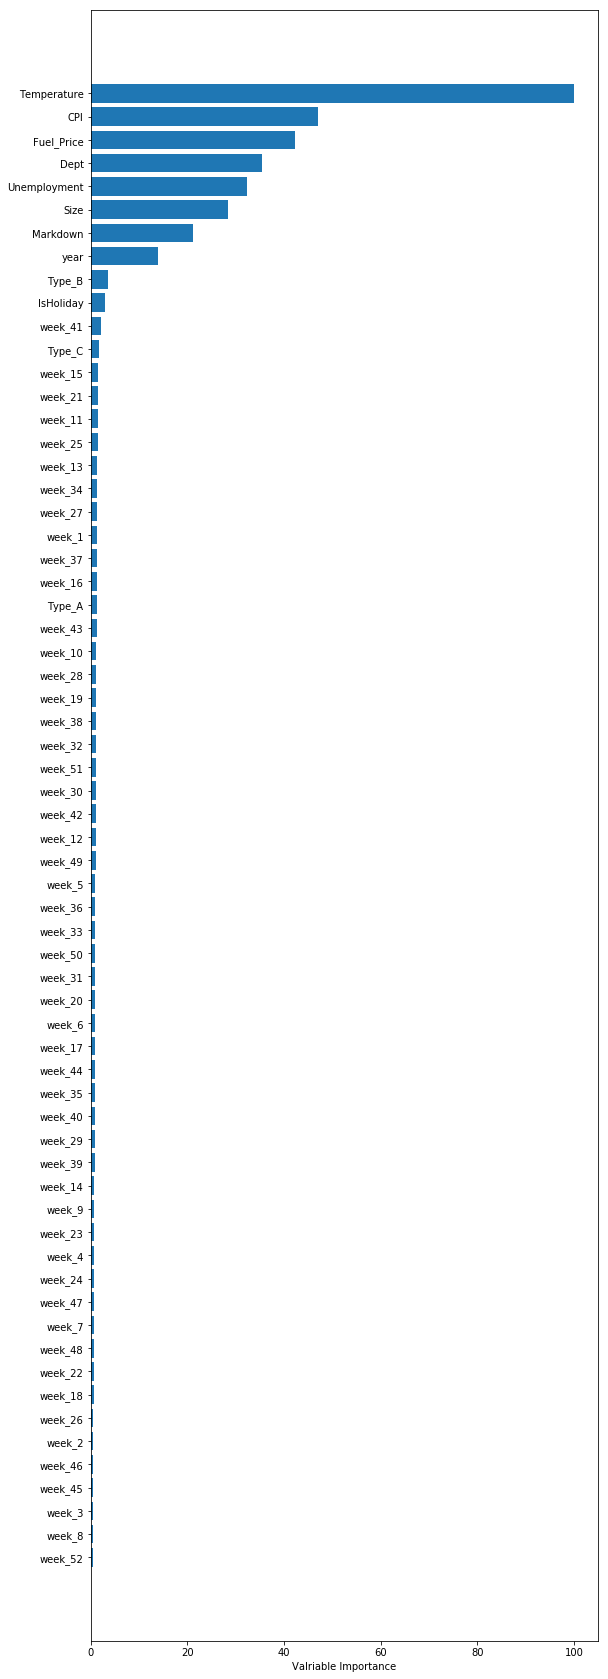

In [28]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])+ .5

plt.figure(figsize=[20,30])
plt.subplot(1,2,2)
plt.barh(pos,feature_importance[sorted_idx],align='center')

plt.yticks(pos,X_train.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.xlabel('Valriable Importance')
plt.show()

#### BUSINESS SOLUTION

In [35]:
df_prediction=data_all.groupby(['Store','Date','week','year','IsHoliday','Type'],as_index=False).mean()
df_prediction['Dept']=data_all.groupby(['Store','Date','week','year','IsHoliday','Type'],as_index=False).count()['Dept']
df_prediction['Weekly_Sales']=data_all.groupby(['Store','Date','week','year','IsHoliday','Type'],as_index=False).sum()['Weekly_Sales']

df_prediction['Markdown']=(df_prediction['MarkDown1']+df_prediction['MarkDown2']+df_prediction['MarkDown3']
                          +df_prediction['MarkDown4']+df_prediction['MarkDown5'])

df_prediction=df_prediction.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

df_prediction=pd.get_dummies(data=df_prediction,columns=['week','Type'])
df_prediction=df_prediction.drop(['Date','month'],axis=1)

df_prediction.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_46,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C
0,1,2010,0,22.161111,2.603,211.671990,7.838,73,1453329.50,14057.506503,...,0,0,0,0,0,0,0,1,0,0
1,1,2010,0,16.816667,2.719,210.820450,7.808,72,1594968.28,14057.506503,...,0,0,0,0,0,0,0,1,0,0
2,1,2010,0,27.172222,2.669,211.223533,7.787,73,1492418.14,14057.506503,...,0,0,0,0,0,0,0,1,0,0
3,1,2010,0,4.405556,2.514,211.289143,8.106,73,1611968.17,14057.506503,...,0,0,0,0,0,0,0,1,0,0
4,1,2010,0,8.127778,2.561,211.319643,8.106,72,1409727.59,14057.506503,...,0,0,0,0,0,0,0,1,0,0


In [36]:
data_solution_real=df_prediction[df_prediction['Store'].isin([33,5,36,38,44])].copy()
data_solution_real['hasil']='Real'
data_solution_real.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C,hasil
572,5,2010,0,21.722222,2.603,212.226946,6.768,64,283178.12,3239.966555,...,0,0,0,0,0,0,0,1,0,Real
573,5,2010,0,17.322222,2.719,211.372888,6.465,64,331406.00,3239.966555,...,0,0,0,0,0,0,0,1,0,Real
574,5,2010,0,27.361111,2.669,211.780186,6.496,61,305993.27,3239.966555,...,0,0,0,0,0,0,0,1,0,Real
575,5,2010,0,5.077778,2.514,211.847128,6.566,65,303447.57,3239.966555,...,0,0,0,0,0,0,0,1,0,Real
576,5,2010,0,8.166667,2.561,211.877147,6.566,65,270281.63,3239.966555,...,0,0,0,0,0,0,0,1,0,Real


#### Menambah Markdown

In [61]:
markdown_mean=data_all_grouped['Markdown'].mean()
markdown_mean

6267.753417249431

In [62]:
data_solution_pred=data_solution_real.copy()
data_solution_pred['hasil']='Prediksi'
data_solution_pred['Markdown']=markdown_mean
data_solution_pred.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C,hasil
572,5,2010,0,21.722222,2.603,212.226946,6.768,64,283178.12,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
573,5,2010,0,17.322222,2.719,211.372888,6.465,64,331406.00,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
574,5,2010,0,27.361111,2.669,211.780186,6.496,61,305993.27,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
575,5,2010,0,5.077778,2.514,211.847128,6.566,65,303447.57,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
576,5,2010,0,8.166667,2.561,211.877147,6.566,65,270281.63,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi


In [63]:
data=data_solution_pred.drop(['Weekly_Sales','hasil','Store'],axis=1)

predictions=model.predict(data)
data_solution_pred['Weekly_Sales']=predictions
data_solution_pred.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C,hasil
572,5,2010,0,21.722222,2.603,212.226946,6.768,64,310594.96875,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
573,5,2010,0,17.322222,2.719,211.372888,6.465,64,356288.62500,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
574,5,2010,0,27.361111,2.669,211.780186,6.496,61,320359.28125,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
575,5,2010,0,5.077778,2.514,211.847128,6.566,65,327759.25000,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
576,5,2010,0,8.166667,2.561,211.877147,6.566,65,294240.34375,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


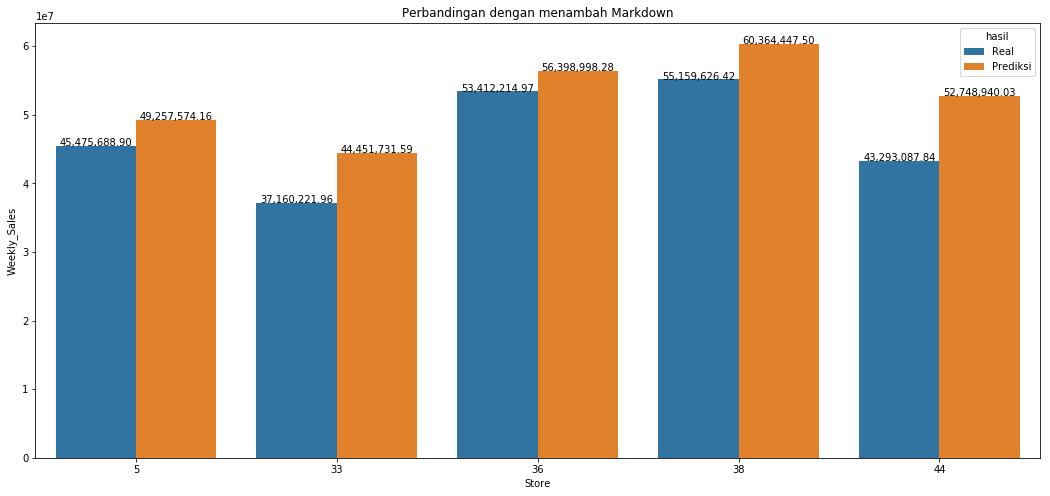

In [64]:
df_compare=pd.concat([data_solution_real,data_solution_pred])

plt.figure(figsize=[18,8])
plt.title('Perbandingan dengan menambah Markdown')
ax = sns.barplot(data=df_compare,x='Store',y='Weekly_Sales',hue='hasil',ci=0,estimator=np.sum)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            "{:,.2f}".format(height),
            ha="center")

#### MENAMBAH JUMLAH DEPT ITEM

In [65]:
Dept_mean=round(data_all_grouped['Dept'].mean())
Dept_mean

66

In [66]:
data_solution_pred=data_solution_real.copy()
data_solution_pred['hasil']='Prediksi'
data_solution_pred['Dept']=Dept_mean
data_solution_pred.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C,hasil
572,5,2010,0,21.722222,2.603,212.226946,6.768,66,283178.12,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
573,5,2010,0,17.322222,2.719,211.372888,6.465,66,331406.00,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
574,5,2010,0,27.361111,2.669,211.780186,6.496,66,305993.27,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
575,5,2010,0,5.077778,2.514,211.847128,6.566,66,303447.57,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
576,5,2010,0,8.166667,2.561,211.877147,6.566,66,270281.63,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi


In [67]:
data=data_solution_pred.drop(['Weekly_Sales','hasil','Store'],axis=1)

predictions=model.predict(data)
data_solution_pred['Weekly_Sales']=predictions
data_solution_pred.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C,hasil
572,5,2010,0,21.722222,2.603,212.226946,6.768,66,305961.81250,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
573,5,2010,0,17.322222,2.719,211.372888,6.465,66,363582.96875,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
574,5,2010,0,27.361111,2.669,211.780186,6.496,66,335431.28125,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
575,5,2010,0,5.077778,2.514,211.847128,6.566,66,320616.71875,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi
576,5,2010,0,8.166667,2.561,211.877147,6.566,66,291398.09375,3239.966555,...,0,0,0,0,0,0,0,1,0,Prediksi


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


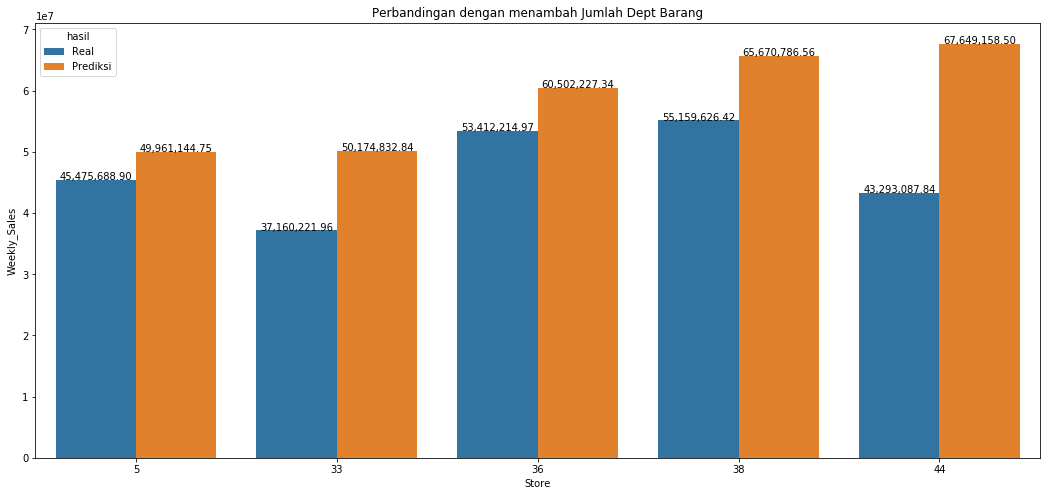

In [68]:
df_compare=pd.concat([data_solution_real,data_solution_pred])

plt.figure(figsize=[18,8])
plt.title('Perbandingan dengan menambah Jumlah Dept Barang')
ax = sns.barplot(data=df_compare,x='Store',y='Weekly_Sales',hue='hasil',ci=0,estimator=np.sum)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            "{:,.2f}".format(height),
            ha="center")

#### Menambah Luas Store

In [69]:
Size_mean=round(data_all_grouped['Size'].mean())
Size_mean

12104

In [70]:
data_solution_pred=data_solution_real.copy()
data_solution_pred['hasil']='Prediksi'
data_solution_pred['Size']=Size_mean
data_solution_pred.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C,hasil
572,5,2010,0,21.722222,2.603,212.226946,6.768,64,283178.12,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
573,5,2010,0,17.322222,2.719,211.372888,6.465,64,331406.00,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
574,5,2010,0,27.361111,2.669,211.780186,6.496,61,305993.27,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
575,5,2010,0,5.077778,2.514,211.847128,6.566,65,303447.57,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
576,5,2010,0,8.166667,2.561,211.877147,6.566,65,270281.63,12104,...,0,0,0,0,0,0,0,1,0,Prediksi


In [71]:
data=data_solution_pred.drop(['Weekly_Sales','hasil','Store'],axis=1)

predictions=model.predict(data)
data_solution_pred['Weekly_Sales']=predictions
data_solution_pred.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C,hasil
572,5,2010,0,21.722222,2.603,212.226946,6.768,64,504607.21875,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
573,5,2010,0,17.322222,2.719,211.372888,6.465,64,617855.37500,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
574,5,2010,0,27.361111,2.669,211.780186,6.496,61,541842.25000,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
575,5,2010,0,5.077778,2.514,211.847128,6.566,65,608565.87500,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
576,5,2010,0,8.166667,2.561,211.877147,6.566,65,594318.06250,12104,...,0,0,0,0,0,0,0,1,0,Prediksi


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


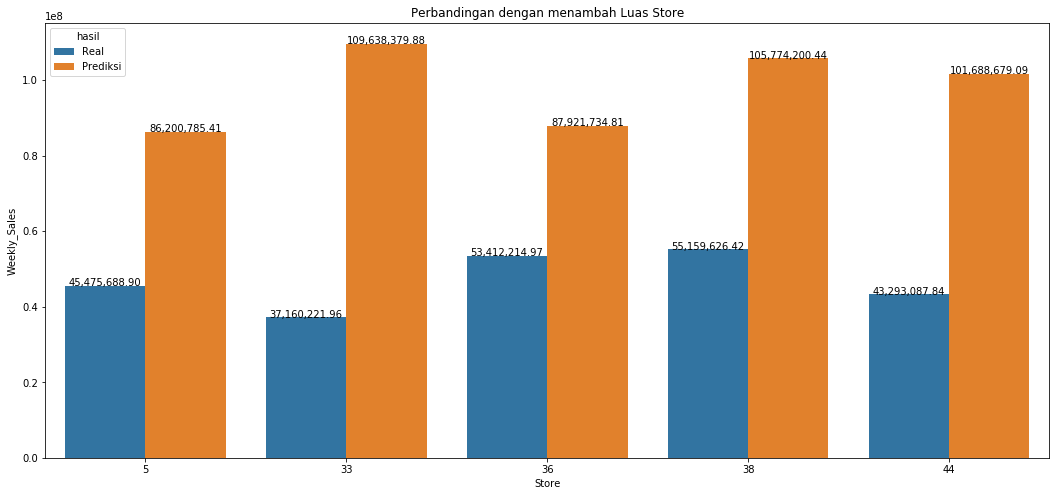

In [72]:
df_compare=pd.concat([data_solution_real,data_solution_pred])

plt.figure(figsize=[18,8])
plt.title('Perbandingan dengan menambah Luas Store')
ax = sns.barplot(data=df_compare,x='Store',y='Weekly_Sales',hue='hasil',ci=0,estimator=np.sum)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            "{:,.2f}".format(height),
            ha="center")

#### SOLUSI GABUNGAN

In [73]:
data_solution_pred=data_solution_real.copy()
data_solution_pred['hasil']='Prediksi'
data_solution_pred['Markdown']=markdown_mean
data_solution_pred['Dept']=Dept_mean
data_solution_pred['Size']=Size_mean
data_solution_pred.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C,hasil
572,5,2010,0,21.722222,2.603,212.226946,6.768,66,283178.12,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
573,5,2010,0,17.322222,2.719,211.372888,6.465,66,331406.00,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
574,5,2010,0,27.361111,2.669,211.780186,6.496,66,305993.27,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
575,5,2010,0,5.077778,2.514,211.847128,6.566,66,303447.57,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
576,5,2010,0,8.166667,2.561,211.877147,6.566,66,270281.63,12104,...,0,0,0,0,0,0,0,1,0,Prediksi


In [74]:
data=data_solution_pred.drop(['Weekly_Sales','hasil','Store'],axis=1)

predictions=model.predict(data)
data_solution_pred['Weekly_Sales']=predictions
data_solution_pred.head()

,Store,year,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,...,week_47,week_48,week_49,week_50,week_51,week_52,Type_A,Type_B,Type_C,hasil
572,5,2010,0,21.722222,2.603,212.226946,6.768,66,593983.1875,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
573,5,2010,0,17.322222,2.719,211.372888,6.465,66,698581.0625,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
574,5,2010,0,27.361111,2.669,211.780186,6.496,66,648090.3750,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
575,5,2010,0,5.077778,2.514,211.847128,6.566,66,621007.6875,12104,...,0,0,0,0,0,0,0,1,0,Prediksi
576,5,2010,0,8.166667,2.561,211.877147,6.566,66,605119.0625,12104,...,0,0,0,0,0,0,0,1,0,Prediksi


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


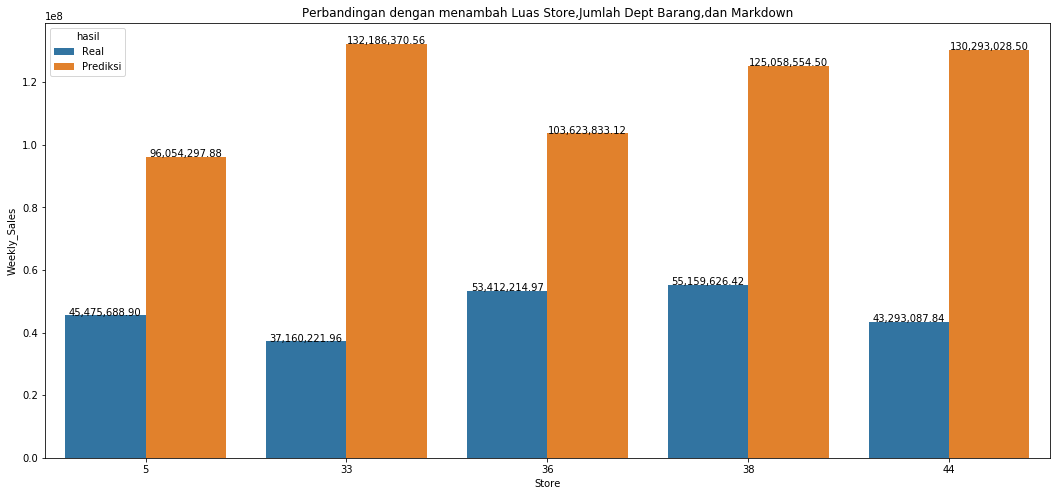

In [75]:
df_compare=pd.concat([data_solution_real,data_solution_pred])

plt.figure(figsize=[18,8])
plt.title('Perbandingan dengan menambah Luas Store,Jumlah Dept Barang,dan Markdown')
ax = sns.barplot(data=df_compare,x='Store',y='Weekly_Sales',hue='hasil',ci=0,estimator=np.sum)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            "{:,.2f}".format(height),
            ha="center")